# <center> **Manipulating Pixels**

## **1. Importing data from Google Drive**

In [ ]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [ ]:
%cd Manipulação\ de\ Pixels\ em\ uma\ imagem

/content/drive/My Drive/Processamento Digital de Imagem/Manipulação de Pixels em uma imagem


## **2. Importing necessary libraries**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## **3. Displaying Images**

We'll be daisplaying images in two different ways:

* Using **OpenCV**
* Using **Matplotlib**

### **3.1 Using OpenCV to display images**

In [ ]:
# This does not work on google colab #

# Reading an image in grayscale #
img = cv.imread('images/sukuna.jpg', 0)

# opening a window with the image img#
cv.imshow('sukuna',img)

# Code necessary to python's kernel not crash #
cv.waitKey(0)
cv.destroyAllWindows()

### **3.2 Using Matplotlib to display images**


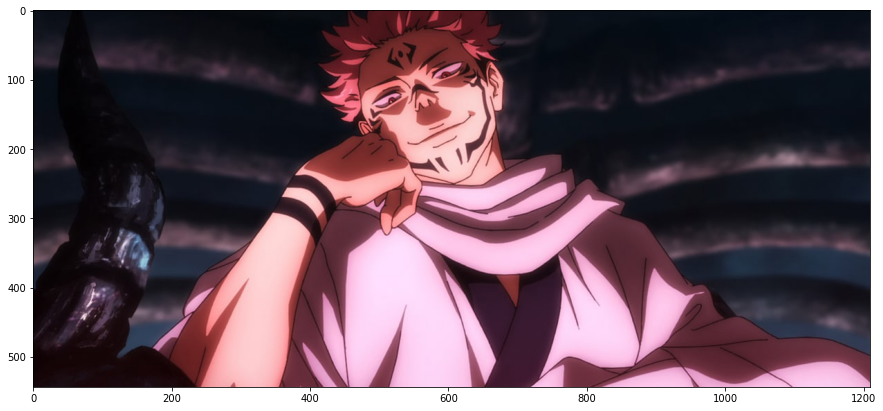

In [ ]:
# Creating a canvas to plot the image #
plt.subplots(figsize=(15, 8))

# Rading the image #
img = plt.imread('images/sukuna.jpg')
# Plotting #
plt.imshow(img)
plt.show()

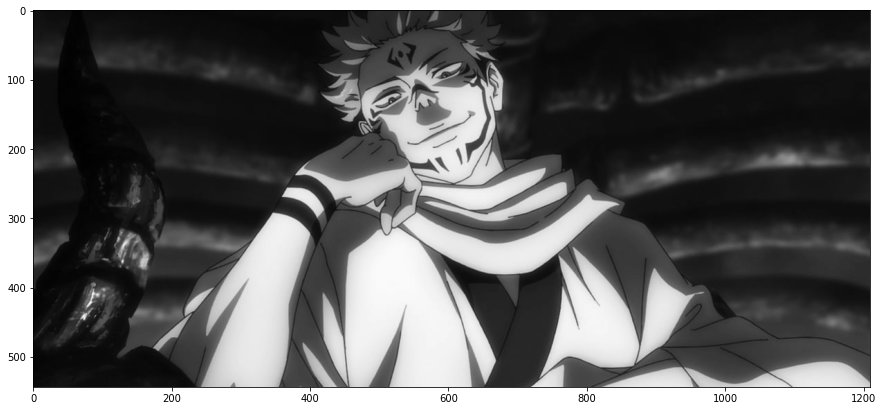

In [ ]:
# Creating a canvas to plot the image #
plt.subplots(figsize=(15, 8))

# Rading the image #
img = Image.open('images/sukuna.jpg').convert("L")  # Convert to grayscale #
img = np.asarray(img)
# Plotting #
plt.imshow(img, cmap = 'gray')
plt.show()

## **4. Applyng negative filter**

To create the negative filter, basically were made the following operation:
```255 - pixel value```

In [ ]:
# Getting image in gray scale #
img = cv.imread('images/sukuna.jpg', 0)

# Getting img shape #
shape = np.shape(img)
print("Image Height: {}\nImage Width: {}".format(shape[0], shape[1]))

Image Height: 544
Image Width: 1210


In [ ]:
# Now we'll create a function to invert gray color #

def negativeImg(img):
    
    shape = np.shape(img)
    
    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            img[i][j] = 255 - img[i][j]
        
    return img

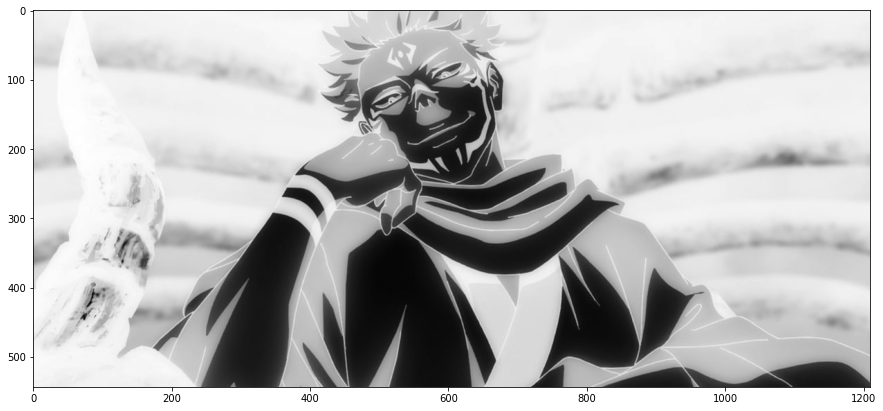

In [ ]:
# applyig function #
img = negativeImg(img)

# Saving the image #
cv.imwrite('images/sukuna_inverted.jpg', img)

# ploting image #
plt.subplots(figsize=(15, 8))

# Lendo a imagem #
img = plt.imread('images/sukuna_inverted.jpg', 0)
# Plotando a imagem #
plt.imshow(img, cmap = 'gray')

plt.show()

### **4.1 Applying negative filter given two points**

Now we already know how to creae a function to apply negative of every pixel from the image, so if we want to apply the negative filter only in a region we need just to limit the **for loop** with the given points.

In [ ]:
# Now i'm create a function to invert color given 2 points #

def negativeImgP(x1, y1, x2, y2, img):

    shape = np.shape(img)
    
    for i in range(x1, x2):
        for j in range(y1, y2):
            img[i][j] = 255 - img[i][j]
            
    return img

In [ ]:
# Getting image in gray scale #
img = cv.imread('images/sukuna.jpg', 0)

# Getting img shape #
shape = np.shape(img)
print("Image Height: {}\nImage Width: {}".format(shape[0], shape[1]))

Image Height: 544
Image Width: 1210


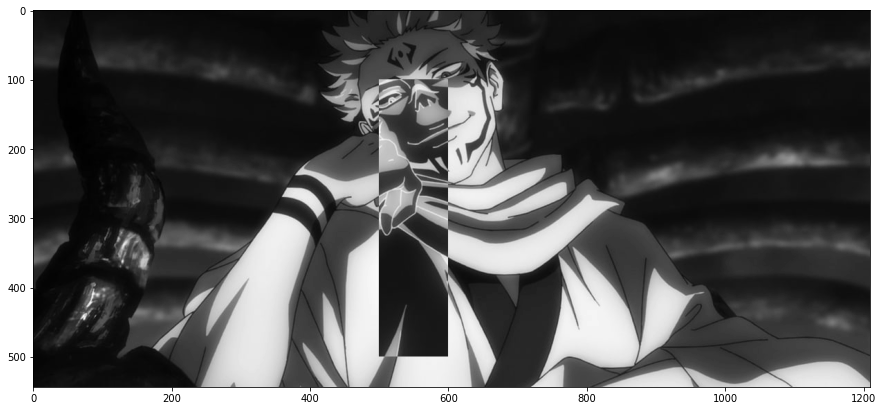

In [ ]:
# applyig function #
img = negativeImgP(100, 500, 500, 600, img)
cv.imwrite('images/sukuna_inverted_region.jpg', img)

# ploting image #
plt.subplots(figsize=(15, 8))

# Lendo a imagem #
img = plt.imread('images/sukuna_inverted_region.jpg', 0)
# Plotando a imagem #
plt.imshow(img, cmap = 'gray')
plt.show()

## **5. Changing regions of an Image**

In [ ]:
# Getting image in gray scale #
img = cv.imread('images/sukuna.jpg', 0)

# Getting img shape #
shape = np.shape(img)
print("Image Height: {}\nImage Width: {}".format(shape[0], shape[1]))

Image Height: 544
Image Width: 1210


In [ ]:
h = int(shape[0]/2) - 1
w = int(shape[1]/2) - 1 

img_copy = img.copy()

for i in range(0, shape[0]):
    for j in range(0, shape[1]):
        if(i < h and j < w):
            aux = img[i][j]
            img_copy[i][j] = img[i+h][j+w]
            img_copy[i+h][j+w] = aux
        else:  
            break
            
for i in range(0, shape[0]):
    for j in range(0, shape[1]):
        if(i < h and j < w):
            aux = img[i][j+w]
            img_copy[i][j+w] = img[i+h][j]
            img_copy[i+h][j] = aux
        else: 
            break

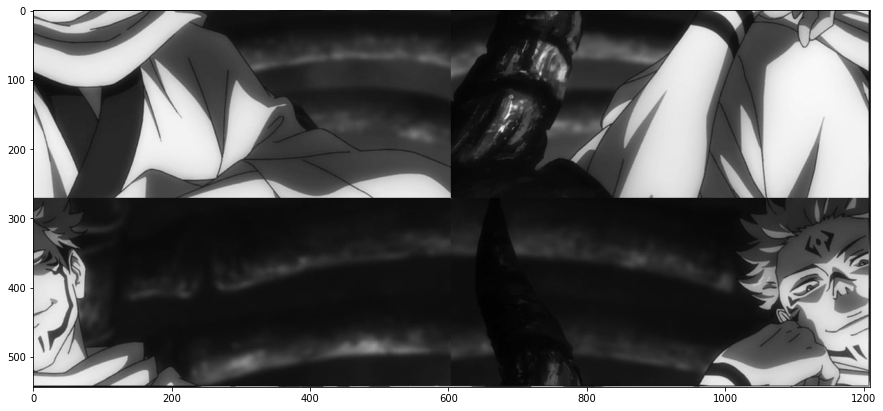

In [ ]:
cv.imwrite('images/sukuna_changed_region.jpg', img_copy)

# ploting image #
plt.subplots(figsize=(15, 8))

# Lendo a imagem #
img = plt.imread('images/sukuna_changed_region.jpg', 0)
# Plotando a imagem #
plt.imshow(img, cmap = 'gray')
plt.show()

## **Bonus: Attempt to shift an image**

In [ ]:
# Getting image in gray scale #
img = cv.imread('images/sukuna.jpg', 0)

# Getting img shape #
shape = np.shape(img)
print("Image Height: {}\nImage Width: {}".format(shape[0], shape[1]))

Image Height: 544
Image Width: 1210


In [ ]:
# Creating a function to translate image #
def TranslateImage(x, y, img):
    
    shape = np.shape(img)
    
    for i in range(shape[0]-x-1, 0, -1):
        for j in range(shape[1]-y-1, 0, -1):
            img[i+x][j+y] = img[i][j]

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if(i <= x or j <= y):
                img[i][j] = 255;
                
    return img

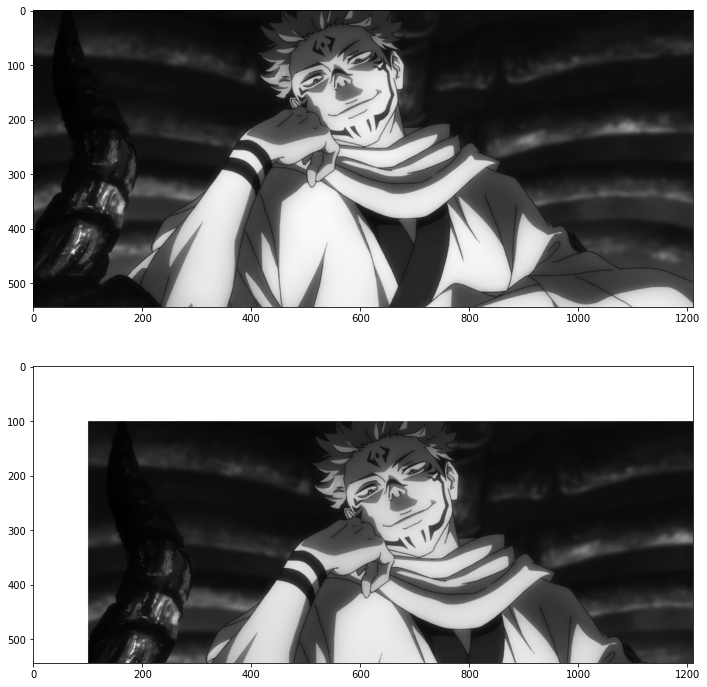

In [ ]:
# Calling the function #
img_translated = TranslateImage(100, 100, img)

# Save image #
cv.imwrite('skuna_translated.jpg', img_translated)

f, ax = plt.subplots(2, 1, figsize=(20, 12))

img1 = Image.open('images/sukuna.jpg').convert("L")  # for RGB images, need to convert #
img1 = np.asarray(img1)
img2 = plt.imread('images/skuna_translated.jpg', 0)

ax[0].imshow(img1, cmap ="gray")
ax[1].imshow(img2, cmap ="gray")

plt.show()